In [246]:
import matplotlib.pyplot as plt
import torch

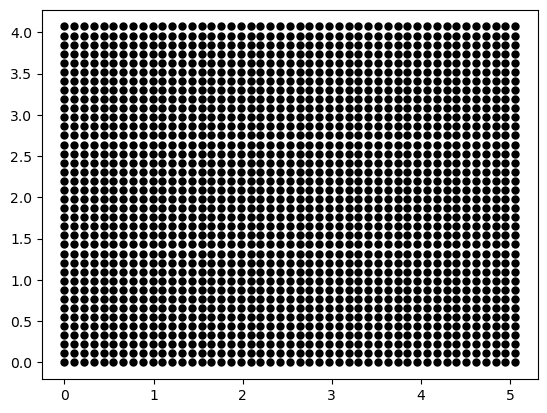

In [247]:
def plot(positions,marker,color,size=5):
    plt.plot(positions.numpy()[:,0],positions.numpy()[:,1], marker=marker, color=color, markersize=size, linestyle='none')

num_centers = 3
width = 5
height = 4
step = .11
x = torch.arange(start=0,end=width+step,step=step)
y = torch.arange(start=0,end=height+step,step=step)
grid_x, grid_y = torch.meshgrid(x, y, indexing='ij')
grid_pos_matrix = torch.stack([grid_x,grid_y],dim=-1).float()
grid_pos = grid_pos_matrix.reshape((grid_pos_matrix.shape[0]*grid_pos_matrix.shape[1],-1))
plot(grid_pos,marker='o',color='k')
plt.show()

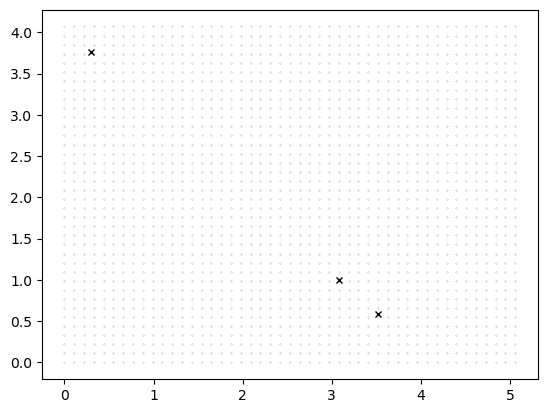

In [248]:
centers_x = torch.FloatTensor(num_centers, 1).uniform_(0, width)
centers_y = torch.FloatTensor(num_centers, 1).uniform_(0, height)
centers_pos = torch.cat([centers_x,centers_y],dim=-1).float()
plot(grid_pos, marker='o', color='k',size=.1)
plot(centers_pos, marker='x', color='k')
plt.show()

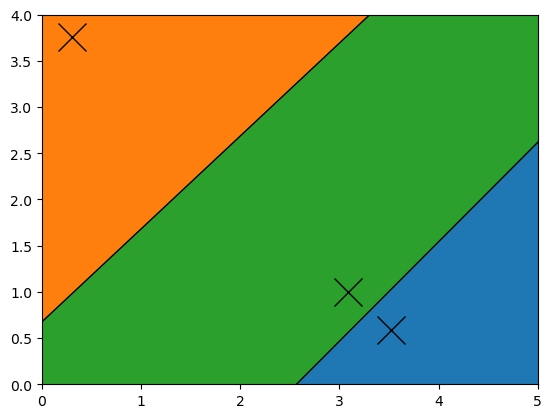

In [249]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d

# make up data points
points = centers_pos.numpy()
# add 4 distant dummy points
points = np.append(points, [[999,999], [-999,999], [999,-999], [-999,-999]], axis = 0)

# compute Voronoi tesselation
vor = Voronoi(points)

# plot
voronoi_plot_2d(vor,show_vertices=False,point_size=0)

# colorize
for region in vor.regions:
    if not -1 in region:
        polygon = [vor.vertices[i] for i in region]
        plt.fill(*zip(*polygon))

# fix the range of axes
plt.xlim([0,width]), plt.ylim([0,height])
plot(centers_pos, marker='x', color='k',size=20)

plt.show()

In [252]:
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

dists = torch.cdist(grid_pos,centers_pos)
# dists.shape
max_idx = torch.argmin(dists,axis=1)
grid_idx = max_idx.reshape(grid_x.shape[1],grid_x.shape[0])
grid_idx
# plot(grid_pos, marker='o', color=max_idx.numpy())

tensor([[1, 1, 1,  ..., 1, 1, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        [0, 0, 0,  ..., 0, 0, 0],
        ...,
        [2, 2, 2,  ..., 2, 2, 2],
        [2, 2, 2,  ..., 1, 1, 1],
        [1, 1, 1,  ..., 1, 1, 1]])

torch.Size([1786, 2])

torch.Size([47])

torch.Size([38])

torch.Size([3, 2])

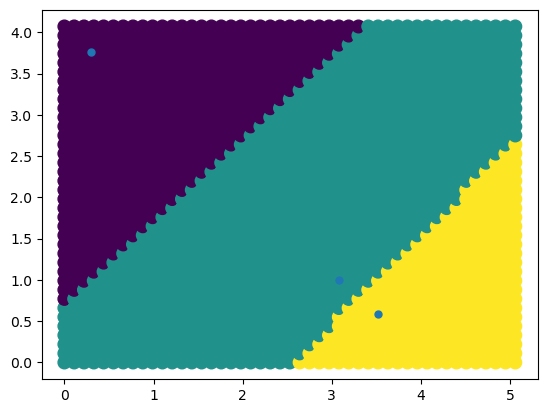

In [253]:

cmap = colors.ListedColormap(['r','g','b'])
# plt.imshow(grid_idx, interpolation='nearest', cmap=cmap)
# plot(grid_pos, marker='o', color='k',size=.1)
display(grid_pos.shape)
display(x.shape)
display(y.shape)
# print(x.shape[0]*y.shape[0])
plt.scatter(grid_pos.numpy()[:,0],grid_pos.numpy()[:,1],s=(1/(step*step)),c=grid_idx)
plt.scatter(centers_pos.numpy()[:,0],centers_pos.numpy()[:,1],s=25)

# https://stackoverflow.com/questions/15822934/matplotlib-imshow-how-to-plot-points-instead-of-image

# plot(centers_pos, marker='x', color='k',size=20)
display(centers_pos.shape)
plt.show()

tensor([[-0.0007, -0.0009, -0.0008],
        [-0.0007, -0.0009, -0.0008],
        [-0.0006, -0.0009, -0.0008],
        ...,
        [-0.0008, -0.0009, -0.0009],
        [-0.0008, -0.0010, -0.0009],
        [-0.0009, -0.0010, -0.0009]])

torch.Size([3])

tensor([5604.3950, 3682.3962, 4223.1997])

ValueError: RGBA values should be within 0-1 range

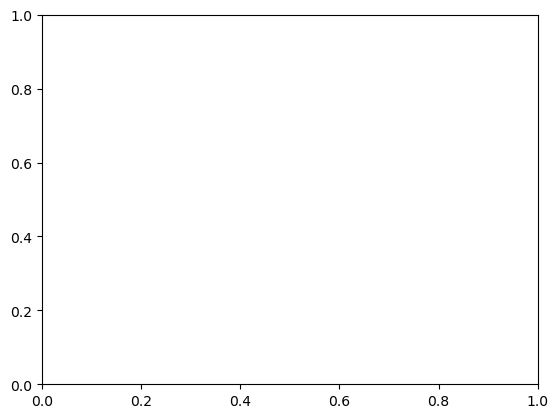

In [311]:
norms = dists.sum(axis=0)
rgb = dists/(1-norms)

display(rgb)
display(norms.shape)
display(norms)

# print(x.shape[0]*y.shape[0])
plt.scatter(grid_pos.numpy()[:,0],grid_pos.numpy()[:,1],s=(1/(step*step)),c=rgb.numpy())
plt.scatter(centers_pos.numpy()[:,0],centers_pos.numpy()[:,1],s=25)

# https://stackoverflow.com/questions/15822934/matplotlib-imshow-how-to-plot-points-instead-of-image

# plot(centers_pos, marker='x', color='k',size=20)


plt.show()